In [1]:
import pandas_datareader.data as pdr
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import chromedriver_binary
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import time
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

In [27]:
options = Options()
#options.add_argument("--headless")


# Enter a stock symbol
url = []
stock_symbol= ['PLTR', 'ABNB']
# URL link 
for i in stock_symbol:
    url_is = 'https://finance.yahoo.com/quote/' + i + '/financials?p=' + i
    url_bs = 'https://finance.yahoo.com/quote/' + i + '/balance-sheet?p=' + i
    url_cf = 'https://finance.yahoo.com/quote/' + i + '/cash-flow?p=' + i
    urls = [url_is, url_bs, url_cf]
    url.extend(urls)

ignored_exceptions=(StaleElementReferenceException,)

soups = []

for i in url:
    driver = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=options)
    driver.get(i)
    try:
        driver.find_element_by_xpath('//button[@class="btn primary"]').click()
    except:
        pass

    WebDriverWait(driver, 3600).until(EC.element_to_be_clickable((By.XPATH, "//section[@data-test='qsp-financial']//span[text()='Quarterly']"))).click()
    WebDriverWait(driver, 3600, ignored_exceptions = ignored_exceptions).until(EC.element_to_be_clickable((By.XPATH, "//section[@data-test='qsp-financial']//span[text()='Annual']")))
    WebDriverWait(driver, 3600, ignored_exceptions = ignored_exceptions).until(EC.presence_of_element_located((By.XPATH, "//div[@data-reactid='35']")))
    
    # for elem in driver.find_elements_by_xpath("//div[@data-reactid='34']"):
    #     print(elem.text)
    driver.implicitly_wait(20)
    # page = driver.page_source
    page = driver.execute_script('return document.body.innerHTML;')
    soup = BeautifulSoup(page,'lxml')
    soups.append(soup)
    driver.quit()

# Reference: https://stackoverflow.com/questions/53541588/how-to-click-a-button-on-yahoo-finance-using-selenium



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\yeungf8452\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: use options instead of chrome_options
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\yeungf8452\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version

In [28]:
headers = []
for j in soups:
    for i in j.find("div", class_= "D(tbr)").find_all('div', class_='Ta(c)'):
        headers.append(i.text)
headers

['ttm',
 '9/29/2021',
 '6/29/2021',
 '3/30/2021',
 '12/31/2020',
 '9/29/2020',
 '9/29/2021',
 '6/29/2021',
 '3/30/2021',
 '12/31/2020',
 '9/29/2020',
 'ttm',
 '',
 '',
 '',
 'ttm',
 '9/29/2021',
 '6/29/2021',
 '3/30/2021',
 '12/31/2020',
 '9/29/2020',
 '9/29/2021',
 '6/29/2021',
 '3/30/2021',
 '12/31/2020',
 '9/29/2020',
 'ttm',
 '12/31/2020',
 '12/31/2019',
 '12/31/2018',
 '12/31/2017']

In [46]:
soup_is = get_html(url_is)
#soup_bs = get_html(url_bs)
#soup_cf = get_html(url_cf)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\yeungf8452\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  


In [39]:
drive = webdriver.Chrome(ChromeDriverManager().install(), options= chrome_options)
drive.implicitly_wait(10)

drive.get(url_is)
drive.find_element_by_xpath('//button[@class="btn primary"]').click()
WebDriverWait(driver, 3600).until(EC.element_to_be_clickable((By.XPATH, "//section[@data-test='qsp-financial']//span[text()='Quarterly']"))).click()

# for elem in drive.find_elements_by_css_selector("P\(0px\).M\(0px\).C\($linkColor\).Bd\(0px\).O\(n\)"):
#     print(elem.text)
#     print("hi")

for elem in drive.find_elements_by_xpath("//button[text()='Quarterly']"):
    print(elem.text)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\yeungf8452\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  import sys


InvalidSelectorException: Message: invalid selector: An invalid or illegal selector was specified
  (Session info: chrome=96.0.4664.45)
Stacktrace:
Backtrace:
	Ordinal0 [0x00596903+2517251]
	Ordinal0 [0x0052F8E1+2095329]
	Ordinal0 [0x00432848+1058888]
	Ordinal0 [0x00434F44+1068868]
	Ordinal0 [0x00434E0E+1068558]
	Ordinal0 [0x00435070+1069168]
	Ordinal0 [0x0045D1C2+1233346]
	Ordinal0 [0x0045D63B+1234491]
	Ordinal0 [0x0048784C+1407052]
	Ordinal0 [0x0047650A+1336586]
	Ordinal0 [0x00485BBF+1399743]
	Ordinal0 [0x0047639B+1336219]
	Ordinal0 [0x004527A7+1189799]
	Ordinal0 [0x00453609+1193481]
	GetHandleVerifier [0x00725904+1577972]
	GetHandleVerifier [0x007D0B97+2279047]
	GetHandleVerifier [0x00626D09+534521]
	GetHandleVerifier [0x00625DB9+530601]
	Ordinal0 [0x00534FF9+2117625]
	Ordinal0 [0x005398A8+2136232]
	Ordinal0 [0x005399E2+2136546]
	Ordinal0 [0x00543541+2176321]
	BaseThreadInitThunk [0x764CFA29+25]
	RtlGetAppContainerNamedObjectPath [0x770F7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x770F7A6E+238]


In [146]:
def make_df(soup):
    headers = []
    for i in soup.find("div", class_= "D(tbr)").find_all('div', class_='D(ib)'):
        headers.append(i.text)

    tbr = soup.find_all("div", class_= "D(tbr)")

    data = []
    for i in range(1,len(tbr)):
        row = []
        for j in tbr[i].find_all('div', class_='D(tbc)'):
            row.append(j.text)
        data.append(row)

    df = pd.DataFrame(data, columns = headers)
    return(df)

In [147]:
bal_sheet = make_df(soup_bs)
inc_sheet = make_df(soup_is)
cash_flow = make_df(soup_cf)

ValueError: 8 columns passed, passed data had 5 columns

In [138]:
cash_flow

,Breakdown,ttm,12/31/2020,12/31/2019,12/31/2018
0,Operating Cash Flow,"222,136","-296,608","-165,215","-39,012"
1,Investing Cash Flow,"-220,984","-14,920","-21,964","-6,784"
2,Financing Cash Flow,"493,391","1,036,453","324,533","46,154"
3,End Cash Position,"2,424,876","2,128,146","1,401,962","1,266,835"
4,Income Tax Paid Supplemental Data,"8,728","14,283","8,579","17,098"
5,Interest Paid Supplemental Data,"4,469","11,432","2,710","2,438"
6,Capital Expenditure,"-11,544","-12,236","-13,096","-13,004"
7,Issuance of Capital Stock,0,"942,529","107,500","96,480"
8,Issuance of Debt,0,"199,369","544,413",0
9,Repayment of Debt,"-200,000","-400,000","-150,000","-56,491"


In [4]:
pltr = pdr.DataReader('PLTR', 'yahoo', start='2020-09-30', end=date.today().strftime("%Y-%m-%d"))
pltr['Mean'] = (pltr['High'] + pltr['Low'])/2

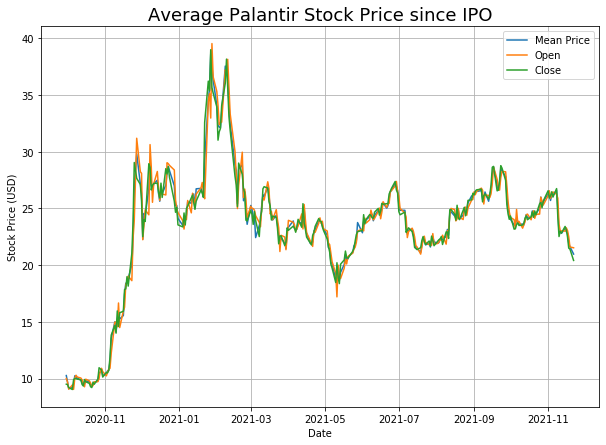

In [5]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(pltr['Mean'], label = 'Mean Price')
ax.plot(pltr['Open'], label = 'Open')
ax.plot(pltr['Close'], label = 'Close')

plt.xlabel('Date')
plt.ylabel('Stock Price (USD)') 
plt.title('Average Palantir Stock Price since IPO', fontsize = 18)
ax.grid()
ax.legend()

plt.show()

In [6]:
pltr_mean = np.array(pltr['Mean']).reshape(-1,1)
min_max_scaler = MinMaxScaler(feature_range=(0,1))
pltr_scaled = min_max_scaler.fit_transform(pltr_mean)

In [7]:
X_data, y_data = [] , []
for i in range(50, len(pltr_scaled)):
    X_data.append(pltr_scaled[i-50:i, 0])
    y_data.append(pltr_scaled[i, 0])

In [25]:
X_train, X_test = np.array(X_data[0:round(0.8*len(X_data))]), np.array(X_data[round(0.8*len(X_data)):len(X_data)])
y_train, y_test = np.array(y_data[0:round(0.8*len(y_data))]), np.array(y_data[round(0.8*len(y_data)):len(y_data)])

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [44]:
# Creating LSTM model with three hidden layers
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 20% of output retained -> dropout = 0.2 because LSTMs often overfit
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose=False)
# batch_size = 1 -> SGD
# batch_size = size of training set -> batch gradient descent
# 1 < batch_size < size of training set -> mini-batch gradient descent

# epoch is the number of times entire training dataset enters NN

# https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

In [45]:
y_hat_test = model.predict(X_test)
y_hat_test = min_max_scaler.inverse_transform(y_hat_test)

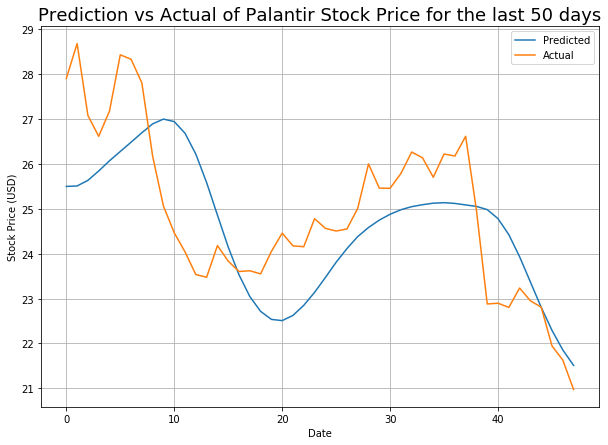

In [46]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(y_hat_test, label = 'Predicted')
ax.plot(min_max_scaler.inverse_transform(y_test.reshape(-1,1)), label = 'Actual')

plt.xlabel('Date')
plt.ylabel('Stock Price (USD)') 
plt.title('Prediction vs Actual of Palantir Stock Price for the last 50 days', fontsize = 18)
ax.grid()
ax.legend()

plt.show()

## ARIMA